In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import json
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("Copper_Set_Result.csv")
df
data=df.copy(True)
data.T

,0,1,2,3,4,5,6,7,8,9,...,58930,58931,58932,58933,58934,58935,58936,58937,58938,58939
id,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,E140FF1B-2407-4C02-A0DD-780A093B1158,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,4E1C4E78-152B-430A-8094-ADD889C9D0AD,FE372230-29B1-4A29-BB73-CB9D3078C286,E1B47219-42C8-411D-AE46-AD5256DC4757,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,2851F48B-DA32-4DF3-884B-17A3100DD65A,6E4D638C-A820-4A40-836F-C9D48BC65528,...,17BA3753-5EA0-477E-8558-0F400FF4907E,96AC5A0E-3853-46C6-955B-E1FC44A5A23D,899ED420-A526-4007-8548-630F764807F3,108C71D3-2D1F-43FE-827D-9CC83A5CA7FA,5B346E5C-F402-41A0-B651-40809845EA80,580B6220-6CD9-487E-B62E-7469F6B35C48,AB9BB7F5-F286-432A-A90A-4A1FD4133584,1BF002A8-A91C-482C-A357-1EA49CFB1B4F,E9689DC2-323D-4372-A576-C07AE91752DE,32C2B716-E920-45C3-A711-8C0792619C5F
item_date,20210401,20210401,20210401,20210401,20210401,20210401,20210401,20210401,20210401,20210401,...,20210119,20210119,20210119,20210119,20210119,20210119,20210119,20210119,20210119,20210119
quantity tons,54.151139,768.024839,386.127949,202.411065,785.526262,225.790676,3.522613,113.387124,69.071853,630.626917,...,52.806977,53.230986,101.726683,53.780286,142.650437,136.415029,136.835123,135.407514,134.838117,139.192
customer,30156308.0,30202938.0,30153963.0,30349574.0,30211560.0,30202938.0,30209509.0,30342192.0,30341428.0,30202938.0,...,30198761.0,30164630.0,30164630.0,30406343.0,30352577.0,30352577.0,30352577.0,30352577.0,30352577.0,NaN
country,28.0,25.0,30.0,32.0,28.0,25.0,30.0,32.0,38.0,25.0,...,26.0,27.0,27.0,26.0,28.0,28.0,28.0,28.0,28.0,NaN
status,Won,Won,Won,Won,Won,Won,Draft,Won,Won,Won,...,Won,Won,Won,Won,Lost,Lost,Lost,Lost,Lost,NaN
item type,W,W,WI,S,W,W,W,W,S,W,...,W,S,S,S,W,W,W,W,W,NaN
application,10.0,41.0,28.0,59.0,10.0,41.0,41.0,41.0,10.0,41.0,...,10.0,15.0,15.0,10.0,56.0,56.0,56.0,56.0,56.0,NaN
thickness,2.0,0.8,0.38,2.3,4.0,1.5,0.38,0.68,0.6,1.5,...,1.0,0.6,0.8,1.5,2.5,2.1,6.9,4.0,3.45,NaN
width,1500.0,1210.0,952.0,1317.0,2000.0,1265.0,1125.0,1220.0,1275.0,1165.0,...,1500.0,1250.0,1250.0,1270.0,1250.0,1250.0,1250.0,1250.0,1500.0,NaN


In [ ]:
data.shape
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58940 entries, 0 to 58939
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             58939 non-null  object 
 1   item_date      58940 non-null  int64  
 2   quantity tons  58940 non-null  float64
 3   customer       58939 non-null  float64
 4   country        58939 non-null  float64
 5   status         58939 non-null  object 
 6   item type      58939 non-null  object 
 7   application    58939 non-null  float64
 8   thickness      58939 non-null  float64
 9   width          58939 non-null  float64
 10  material_ref   33041 non-null  object 
 11  product_ref    58939 non-null  float64
 12  delivery date  58939 non-null  float64
 13  selling_price  58939 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 6.3+ MB


,0
id,1
item_date,0
quantity tons,0
customer,1
country,1
status,1
item type,1
application,1
thickness,1
width,1


In [ ]:
for i in list(data.columns):
    print(f"{i}  \t:_____________{data[i].nunique()}")

data[data["id"].isna()==True]['id']
data.iloc[26]
data.describe().T

id  	:_____________58939
item_date  	:_____________70
quantity tons  	:_____________58940
customer  	:_____________938
country  	:_____________17
status  	:_____________9
item type  	:_____________7
application  	:_____________30
thickness  	:_____________470
width  	:_____________1134
material_ref  	:_____________10466
product_ref  	:_____________29
delivery date  	:_____________22
selling_price  	:_____________3739


,count,mean,std,min,25%,50%,75%,max
item_date,58940.0,2.021025e+07,1.074635e+03,1.995000e+07,2.021020e+07,2.021030e+07,2.021032e+07,2.021040e+07
quantity tons,58940.0,9.663334e+01,3.908683e+02,1.867763e-03,1.057045e+01,3.078013e+01,6.799299e+01,2.030029e+04
customer,58939.0,3.023388e+07,1.437577e+05,1.245800e+04,3.019687e+07,3.020531e+07,3.028431e+07,3.040818e+07
country,58939.0,4.439449e+01,2.429171e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,58939.0,2.524924e+01,1.753264e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,58939.0,2.568180e+00,1.076419e+01,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,58939.0,1.302137e+03,2.523890e+02,1.000000e+00,1.190000e+03,1.250000e+03,1.500000e+03,2.300000e+03
product_ref,58939.0,5.123112e+08,7.384252e+08,6.117280e+05,6.281170e+05,6.406650e+05,1.668702e+09,1.722208e+09
delivery date,58939.0,2.021072e+07,4.160283e+04,2.019040e+07,2.021040e+07,2.021060e+07,2.021070e+07,3.031010e+07
selling_price,58939.0,4.354421e+03,5.825189e+05,-1.160000e+03,8.600000e+02,9.550000e+02,1.075000e+03,1.000010e+08


In [ ]:
columns_to_convert_datetime = ['item_date', 'delivery date']
for i in columns_to_convert_datetime:
    data[i] = pd.to_datetime(data[i], format='%Y%m%d', errors='coerce').dt.date
data.head(2)
data.dtypes
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y-%m-%d')
data['delivery date']=pd.to_datetime(data['delivery date'],format='%Y-%m-%d')
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1.668702e+09,2021-04-01,1047.0


In [ ]:
print(data['item_date'].max())
print(data['item_date'].min())
print(data["delivery date"].max())
print(data['delivery date'].min())
data.dtypes

2021-04-01 00:00:00
2021-01-19 00:00:00
2022-01-01 00:00:00
2019-04-01 00:00:00


,0
id,object
item_date,datetime64[ns]
quantity tons,float64
customer,float64
country,float64
status,object
item type,object
application,float64
thickness,float64
width,float64


In [ ]:
data.dtypes
columns_to_convert_numeric = ["quantity tons", "customer","country", "application", "thickness", "width", "selling_price"]
for i in columns_to_convert_numeric:
  data[i]=pd.to_numeric(data[i],errors='coerce')
data.head(2)
data.dtypes

,0
id,object
item_date,datetime64[ns]
quantity tons,float64
customer,float64
country,float64
status,object
item type,object
application,float64
thickness,float64
width,float64


In [ ]:
data.isna().sum()

,0
id,1
item_date,1
quantity tons,0
customer,1
country,1
status,1
item type,1
application,1
thickness,1
width,1


In [ ]:
data.drop(columns=['id'],inplace=True)
data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1.668702e+09,2021-04-01,1047.0


In [ ]:
data['material_ref'] = data['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
data.head(3)
data.drop(columns=['material_ref'],inplace=True)
data.head(2)
data.isna().sum()
data.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,58939,2021-02-24 21:53:27.987919872,2021-01-19 00:00:00,2021-02-04 00:00:00,2021-03-01 00:00:00,2021-03-16 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,58940.0,96.633344,0.001868,10.570448,30.780126,67.992986,20300.29359,390.868292
customer,58939.0,30233882.114525,12458.0,30196870.0,30205312.0,30284310.0,30408185.0,143757.667717
country,58939.0,44.394493,25.0,26.0,30.0,78.0,113.0,24.291707
application,58939.0,25.249241,2.0,10.0,15.0,41.0,99.0,17.53264
thickness,58939.0,2.56818,0.18,0.7,1.5,3.0,2500.0,10.764188
width,58939.0,1302.136819,1.0,1190.0,1250.0,1500.0,2300.0,252.389042
product_ref,58939.0,512311228.917966,611728.0,628117.0,640665.0,1668701718.0,1722207579.0,738425219.00211
delivery date,58938,2021-05-19 05:15:35.640843264,2019-04-01 00:00:00,2021-04-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,58939.0,4354.420745,-1160.0,860.0,955.0,1075.0,100001015.0,582518.923843


In [ ]:
data['quantity tons'].fillna(data['quantity tons'].median(), inplace=True)
data['customer'].fillna(data['customer'].median(), inplace=True)
data['country'].fillna(data['country'].median(), inplace=True)
data['application'].fillna(data['application'].median(), inplace=True)
data['thickness'].fillna(data['thickness'].median(), inplace=True)
data['selling_price'].fillna(data['selling_price'].median(), inplace=True)

In [ ]:
data['item_date'].fillna(data['item_date'].mode().iloc[0], inplace=True)
data['status'].fillna(data['status'].mode().iloc[0], inplace=True)
data['delivery date'].fillna(data['delivery date'].mode().iloc[0], inplace=True)
data["country"]=data["country"].astype('int64')
data.isna().sum()
data.dtypes
eda_data=data.copy(True)

In [ ]:
eda_data.dtypes

,0
item_date,datetime64[ns]
quantity tons,float64
customer,float64
country,int64
status,object
item type,object
application,float64
thickness,float64
width,float64
product_ref,float64


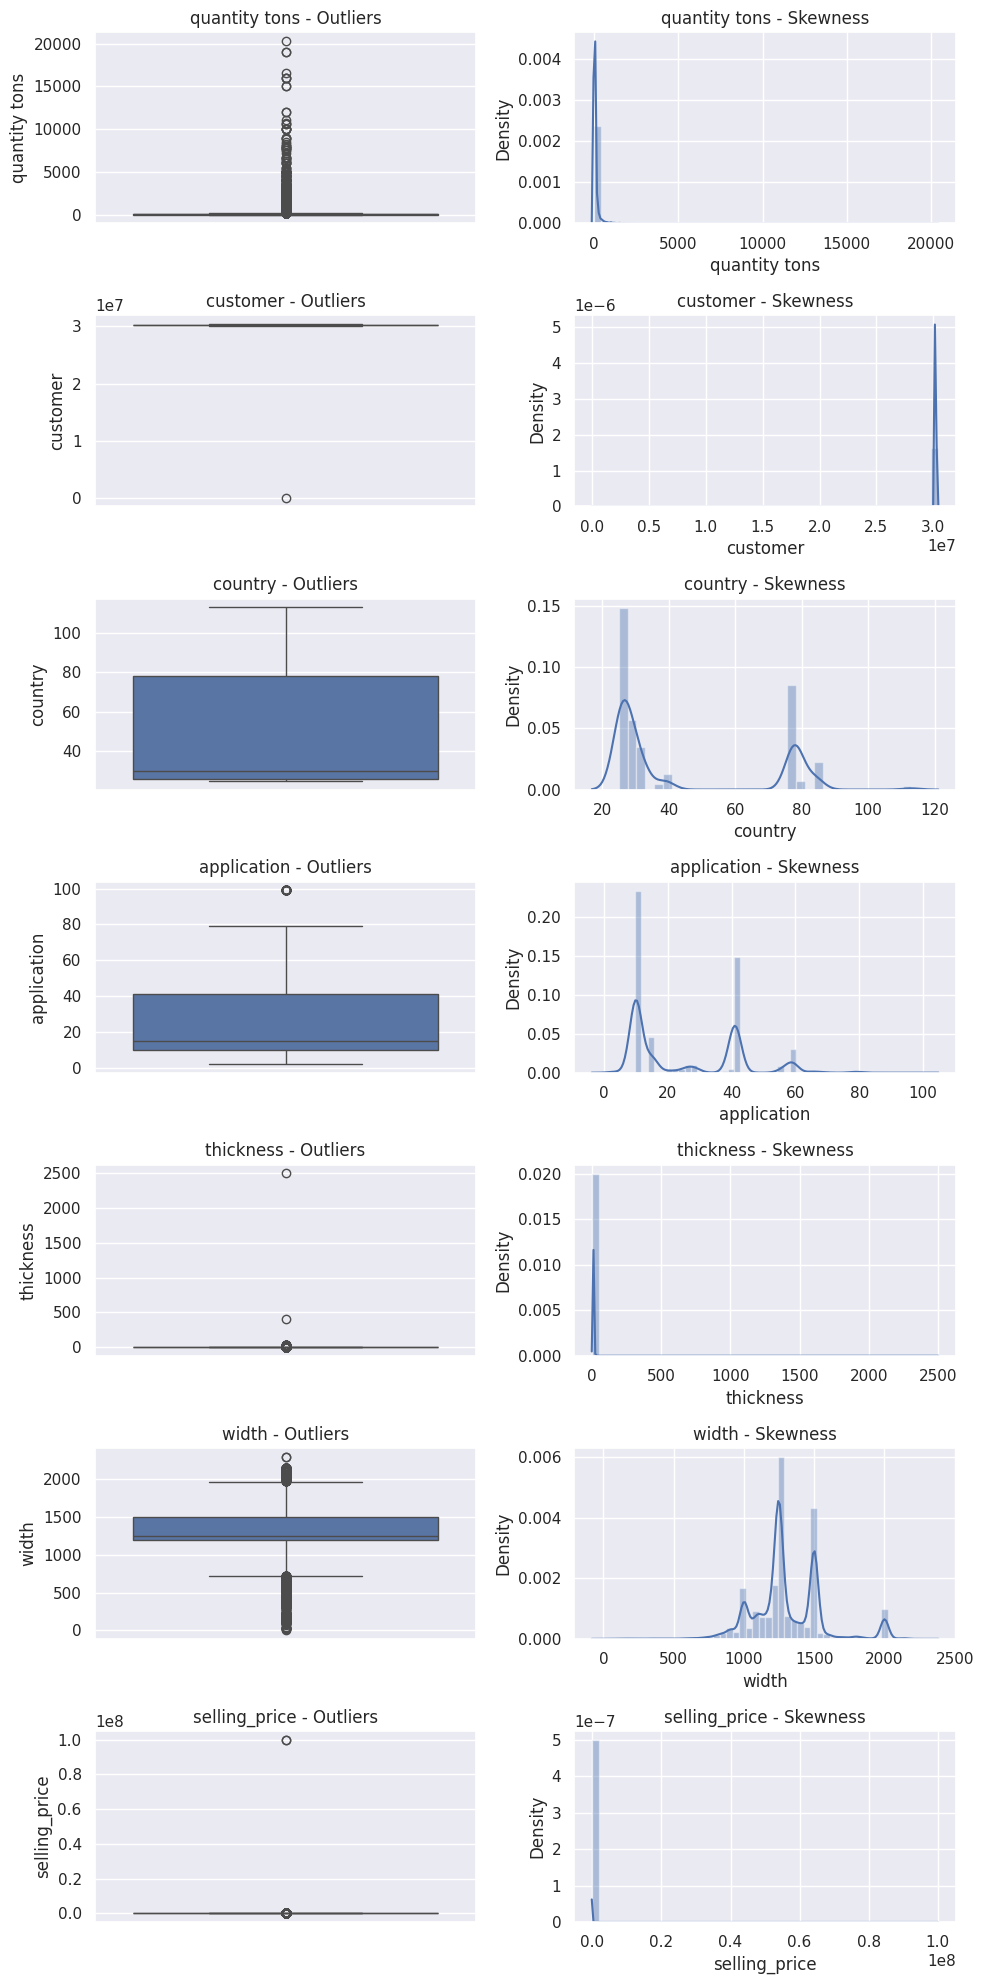

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(10,20))

sns.boxplot(ax=axes[0, 0], data=eda_data['quantity tons'])      #quantity tons
axes[0, 0].set_title('quantity tons - Outliers')
sns.distplot(ax=axes[0, 1], a=eda_data['quantity tons'])
axes[0, 1].set_title('quantity tons - Skewness')

sns.boxplot(ax=axes[1, 0], data=eda_data['customer'])          #customer
axes[1, 0].set_title('customer - Outliers')
sns.distplot(ax=axes[1, 1], a=eda_data['customer'])
axes[1, 1].set_title('customer - Skewness')

sns.boxplot(ax=axes[2, 0], data=eda_data['country'])           #country
axes[2, 0].set_title('country - Outliers')
sns.distplot(ax=axes[2, 1], a=eda_data['country'])
axes[2, 1].set_title('country - Skewness')

sns.boxplot(ax=axes[3, 0], data=eda_data['application'])       #application
axes[3, 0].set_title('application - Outliers')
sns.distplot(ax=axes[3, 1], a=eda_data['application'])
axes[3, 1].set_title('application - Skewness')

sns.boxplot(ax=axes[4, 0], data=eda_data['thickness'])        #thickness
axes[4, 0].set_title('thickness - Outliers')
sns.distplot(ax=axes[4, 1], a=eda_data['thickness'])
axes[4, 1].set_title('thickness - Skewness')

sns.boxplot(ax=axes[5, 0], data=eda_data['width'])            #width
axes[5, 0].set_title('width - Outliers')
sns.distplot(ax=axes[5, 1], a=eda_data['width'])
axes[5, 1].set_title('width - Skewness')

sns.boxplot(ax=axes[6, 0], data=eda_data['selling_price'])   #selling_price
axes[6, 0].set_title('selling_price - Outliers')
sns.distplot(ax=axes[6, 1], a=eda_data['selling_price'])
axes[6, 1].set_title('selling_price - Skewness')

plt.tight_layout()
plt.show()

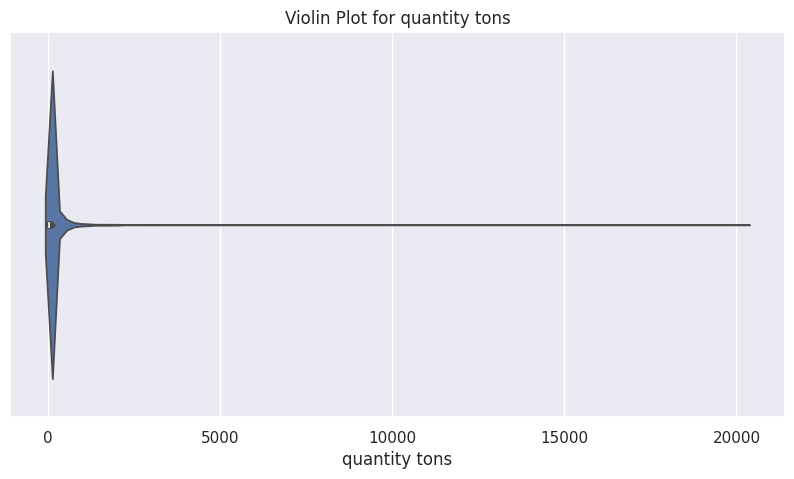

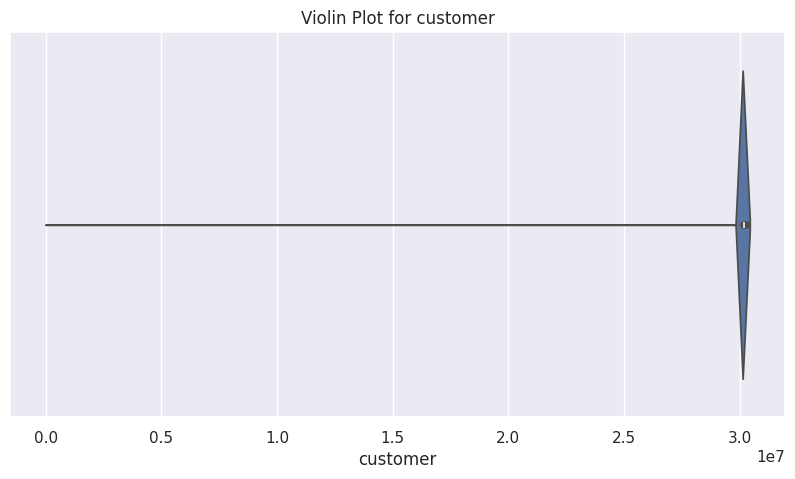

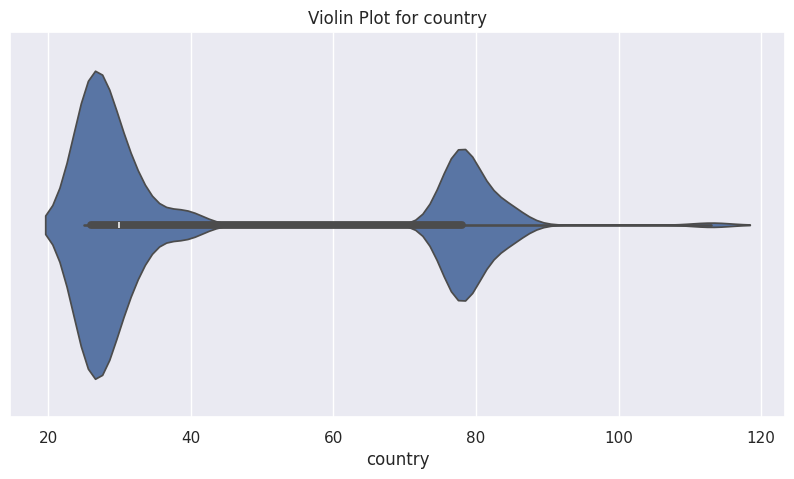

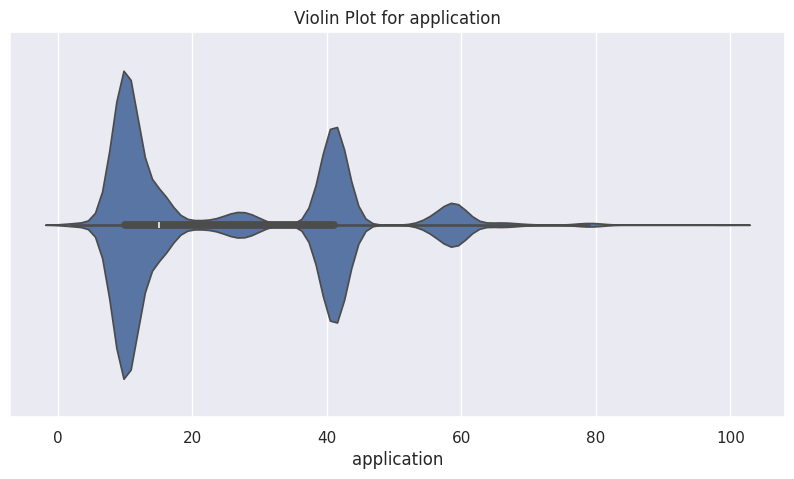

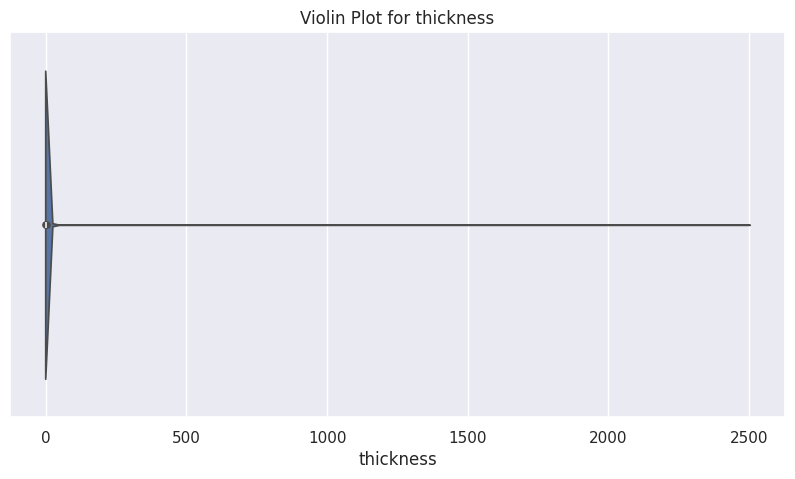

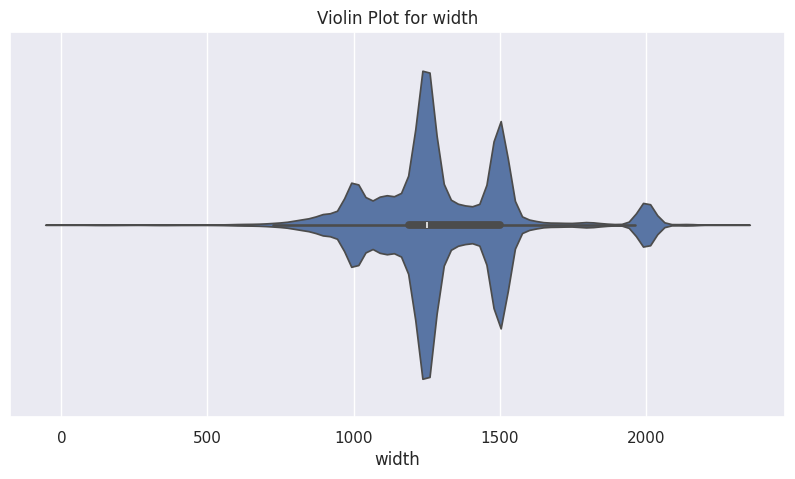

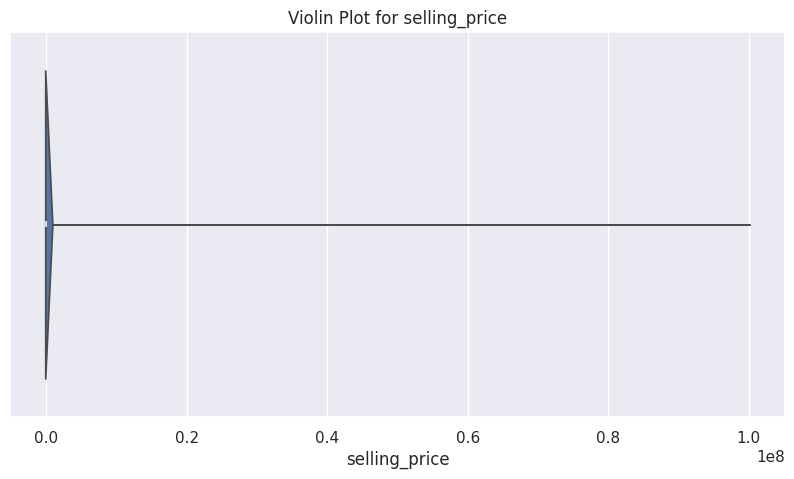

quantity tons : 0 
thickness : 0 
width : 0 
selling_price : 6 


In [ ]:
def plot(eda_data, column):
    plt.figure(figsize=(10,5))
    plt.subplot(1,1,1)
    sns.violinplot(data=eda_data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()
for i in ['quantity tons', 'customer', 'country',  'application', 'thickness', 'width', 'selling_price']:
    plot(eda_data, i)

out_skew_data=eda_data.copy(True)
skewed_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
for column in skewed_columns:
    neg = (out_skew_data[column] <= 0)
    print(f'{column} : {neg.sum()} ')
    out_skew_data.loc[neg,column] = np.nan
out_skew_data.isna().sum()
out_skew_data.dropna(inplace=True)
out_skew_data.isna().sum()
out_skew_data_1=out_skew_data.copy(True)

out_skew_data_1=out_skew_data_1.drop(['item_date','delivery date','status','item type'],axis=1)

In [ ]:
out_skew_data_1.skew()
print(out_skew_data['item_date'].max())
print(out_skew_data['item_date'].min())
print(out_skew_data["delivery date"].max())
print(out_skew_data['delivery date'].min())

2021-04-01 00:00:00
2021-01-19 00:00:00
2022-01-01 00:00:00
2019-04-01 00:00:00


In [ ]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
before_stats = out_skew_data[outlier_columns].describe()
for column in outlier_columns:
    Q1 = out_skew_data[column].quantile(0.25)
    Q3 = out_skew_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out_skew_data[column] = out_skew_data[column].clip(lower_bound, upper_bound)

Summary statistics before removing outliers:
       quantity tons     thickness         width  selling_price
count   58933.000000  58933.000000  58933.000000   5.893300e+04
mean       96.636714      2.525917   1302.144045   4.354904e+03
std       390.891105      3.168741    252.400026   5.825486e+05
min         0.001868      0.180000      1.000000   1.000000e-01
25%        10.568478      0.700000   1190.000000   8.600000e+02
50%        30.779351      1.500000   1250.000000   9.550000e+02
75%        67.992678      3.000000   1500.000000   1.075000e+03
max     20300.293590    400.000000   2300.000000   1.000010e+08

Summary statistics after removing outliers:
       quantity tons     thickness         width  selling_price
count   58933.000000  58933.000000  58933.000000   58933.000000
mean       50.174958      2.249151   1301.794073     972.735420
std        49.304770      1.876834    241.439559     170.981075
min         0.001868      0.180000    725.000000     537.500000
25%        10.

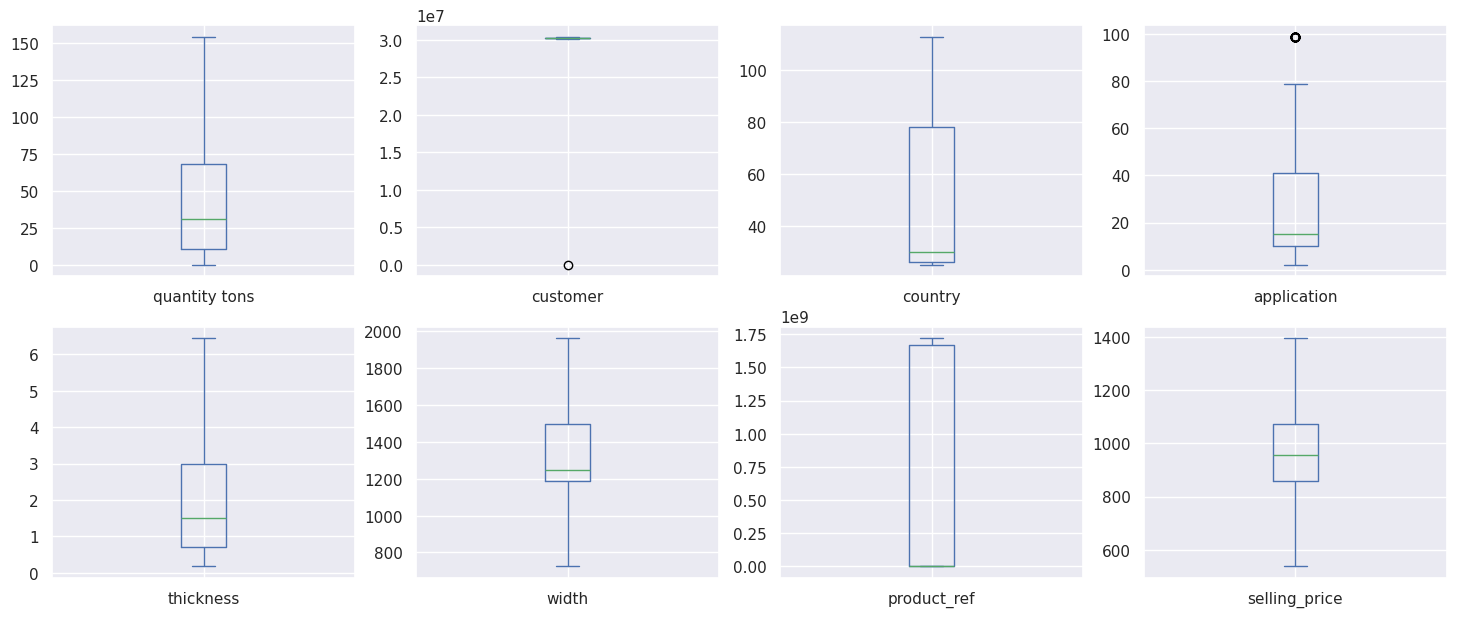

In [ ]:
after_stats = out_skew_data[outlier_columns].describe()
print("Summary statistics before removing outliers:")
print(before_stats)
print("\nSummary statistics after removing outliers:")
print(after_stats)
out_skew_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']

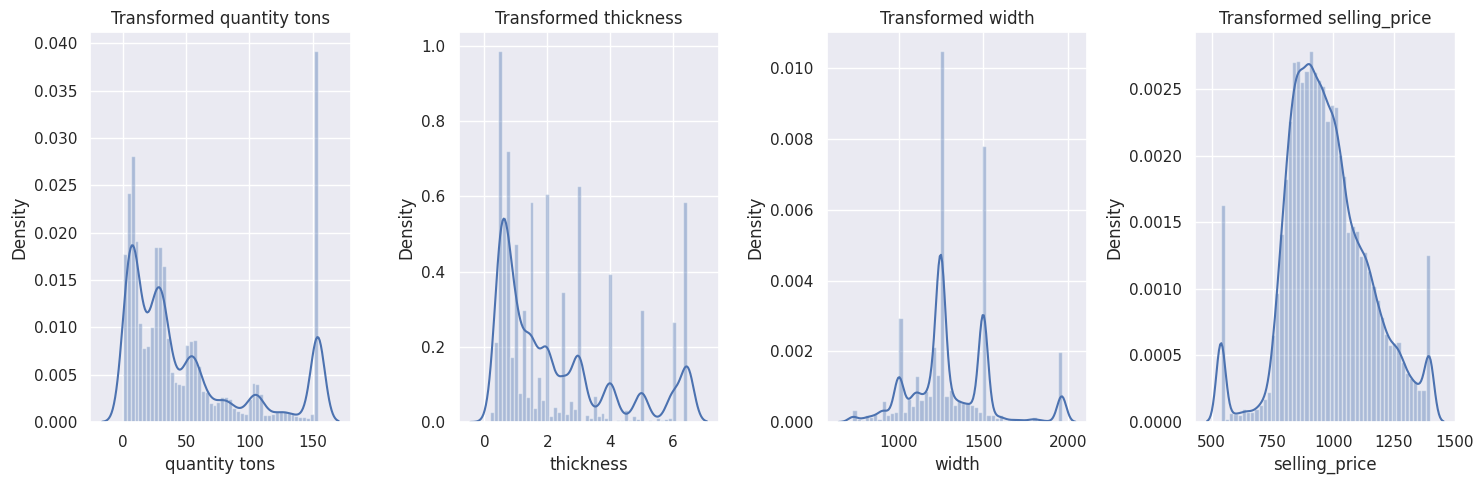

,0
quantity tons,22.247341
customer,-157.530891
country,0.832057
application,0.698129
thickness,35.055589
width,0.570999
product_ref,0.877339
selling_price,171.653682


In [ ]:
fig, axes = plt.subplots(1, 4,figsize=(15, 5))
axes = axes.flatten()
for i, column in enumerate(outlier_columns):
    sns.distplot(out_skew_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed {column}")

plt.tight_layout()
plt.show()
out_skew_data_1.skew()

In [ ]:
model_data=out_skew_data.copy(True)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58933 entries, 0 to 58938
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   item_date      58933 non-null  datetime64[ns]
 1   quantity tons  58933 non-null  float64       
 2   customer       58933 non-null  float64       
 3   country        58933 non-null  int64         
 4   status         58933 non-null  object        
 5   item type      58933 non-null  object        
 6   application    58933 non-null  float64       
 7   thickness      58933 non-null  float64       
 8   width          58933 non-null  float64       
 9   product_ref    58933 non-null  float64       
 10  delivery date  58933 non-null  datetime64[ns]
 11  selling_price  58933 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 5.8+ MB


In [ ]:
model_data['delivery_time_taken']=(model_data['item_date']-model_data['delivery date']).abs().dt.days
model_data.head()
x=model_data[['application','thickness','width','selling_price','quantity tons','country','customer','product_ref','delivery_time_taken']]
model_data.info()
num=model_data.select_dtypes(include=np.number)
num

<class 'pandas.core.frame.DataFrame'>
Index: 58933 entries, 0 to 58938
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   item_date            58933 non-null  datetime64[ns]
 1   quantity tons        58933 non-null  float64       
 2   customer             58933 non-null  float64       
 3   country              58933 non-null  int64         
 4   status               58933 non-null  object        
 5   item type            58933 non-null  object        
 6   application          58933 non-null  float64       
 7   thickness            58933 non-null  float64       
 8   width                58933 non-null  float64       
 9   product_ref          58933 non-null  float64       
 10  delivery date        58933 non-null  datetime64[ns]
 11  selling_price        58933 non-null  float64       
 12  delivery_time_taken  58933 non-null  int64         
dtypes: datetime64[ns](2), float64(7), in

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28,10.0,2.00,1500.0,1.670799e+09,854.00,91
1,154.128978,30202938.0,25,41.0,0.80,1210.0,1.668702e+09,1047.00,0
2,154.128978,30153963.0,30,28.0,0.38,952.0,6.283770e+05,644.33,90
3,154.128978,30349574.0,32,59.0,2.30,1317.0,1.668702e+09,768.00,90
4,154.128978,30211560.0,28,10.0,4.00,1965.0,6.406650e+05,577.00,31
...,...,...,...,...,...,...,...,...,...
58934,142.650437,30352577.0,28,56.0,2.50,1250.0,1.670799e+09,853.00,102
58935,136.415029,30352577.0,28,56.0,2.10,1250.0,1.670799e+09,865.00,102
58936,136.835123,30352577.0,28,56.0,6.45,1250.0,1.670799e+09,858.00,102
58937,135.407514,30352577.0,28,56.0,4.00,1250.0,1.670799e+09,857.00,102


In [ ]:
corrm=num.corr()
corrm

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time_taken
quantity tons,1.000000,0.033999,-0.080994,0.122222,0.026727,0.010480,0.077558,-0.031471,0.035946
customer,0.033999,1.000000,0.073655,-0.001901,0.088661,0.050709,-0.015741,0.012435,0.020067
country,-0.080994,0.073655,1.000000,0.000537,-0.053560,0.043130,-0.174940,-0.004890,-0.280919
application,0.122222,-0.001901,0.000537,1.000000,-0.173212,-0.200881,-0.138584,0.164559,-0.172401
thickness,0.026727,0.088661,-0.053560,-0.173212,1.000000,0.433841,0.129907,-0.450974,0.035146
width,0.010480,0.050709,0.043130,-0.200881,0.433841,1.000000,-0.021332,-0.236393,-0.008188
product_ref,0.077558,-0.015741,-0.174940,-0.138584,0.129907,-0.021332,1.000000,-0.117517,0.199342
selling_price,-0.031471,0.012435,-0.004890,0.164559,-0.450974,-0.236393,-0.117517,1.000000,0.106012
delivery_time_taken,0.035946,0.020067,-0.280919,-0.172401,0.035146,-0.008188,0.199342,0.106012,1.000000


['28' '25' '30' '32' '38' '78' '27' '77' '113' '79' '26' '39' '40' '84'
 '80' '107' '89']
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


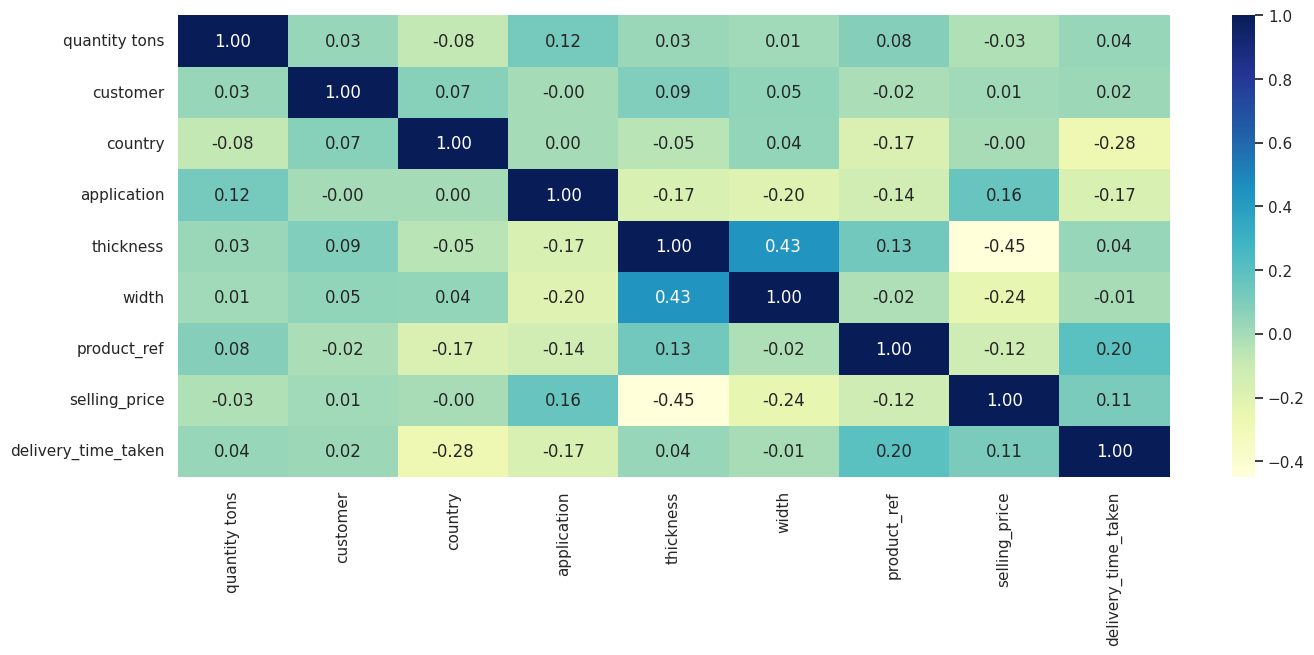

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="YlGnBu",fmt=".2f")
model_data['country'] = model_data['country'].astype(str)
country=model_data['country'].unique()
status=model_data['status'].unique()
item=model_data['item type'].unique()
print(country)
print(status)
print(item)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encode=OrdinalEncoder()
model_data["country"] = encode.fit_transform(model_data[["country"]])
transformed_country=model_data["country"].unique()
transformed_country

encode=OrdinalEncoder()
model_data['status'] = encode.fit_transform(model_data[['status']])
transformed_status=model_data['status'].unique()

transformed_status
encode=OrdinalEncoder()
model_data["item type"] = encode.fit_transform(model_data[["item type"]])
transformed_item=model_data["item type"].unique()

transformed_item
model_data.head(3)
co=model_data.corr()
co

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,delivery_time_taken
item_date,1.000000,0.015748,0.034364,-0.059497,0.129557,0.020312,0.033181,0.064971,0.012953,0.035446,0.462508,0.136628,0.052509
quantity tons,0.015748,1.000000,0.033999,-0.081817,-0.041792,-0.210775,0.122222,0.026727,0.010480,0.077558,0.023140,-0.031471,0.035946
customer,0.034364,0.033999,1.000000,0.071054,-0.022159,-0.064510,-0.001901,0.088661,0.050709,-0.015741,0.031821,0.012435,0.020067
country,-0.059497,-0.081817,0.071054,1.000000,0.048575,0.138143,-0.043212,-0.016859,0.050237,-0.157653,-0.219857,-0.046310,-0.252162
status,0.129557,-0.041792,-0.022159,0.048575,1.000000,0.214900,0.101735,-0.087228,-0.051955,-0.052062,-0.137403,0.122995,-0.225606
item type,0.020312,-0.210775,-0.064510,0.138143,0.214900,1.000000,0.161550,-0.092693,-0.101383,-0.083352,-0.063787,0.067537,-0.102485
application,0.033181,0.122222,-0.001901,-0.043212,0.101735,0.161550,1.000000,-0.173212,-0.200881,-0.138584,-0.135232,0.164559,-0.172401
thickness,0.064971,0.026727,0.088661,-0.016859,-0.087228,-0.092693,-0.173212,1.000000,0.433841,0.129907,0.064045,-0.450974,0.035146
width,0.012953,0.010480,0.050709,0.050237,-0.051955,-0.101383,-0.200881,0.433841,1.000000,-0.021332,0.007954,-0.236393,-0.008188
product_ref,0.035446,0.077558,-0.015741,-0.157653,-0.052062,-0.083352,-0.138584,0.129907,-0.021332,1.000000,0.175133,-0.117517,0.199342


In [ ]:
for i, j in zip(status, transformed_status):
    print('After encoding :',i,'----- encoded :',j)
for i,j in zip(item, transformed_item):
    print('After encoding :',i,'----- encoded :',j)
for i,j in zip(country, transformed_country):
    print('After encoding :',i,'----- encoded :',j)

After encoding : Won ----- encoded : 7.0
After encoding : Draft ----- encoded : 0.0
After encoding : To be approved ----- encoded : 6.0
After encoding : Lost ----- encoded : 1.0
After encoding : Not lost for AM ----- encoded : 2.0
After encoding : Wonderful ----- encoded : 8.0
After encoding : Revised ----- encoded : 5.0
After encoding : Offered ----- encoded : 4.0
After encoding : Offerable ----- encoded : 3.0
After encoding : W ----- encoded : 5.0
After encoding : WI ----- encoded : 6.0
After encoding : S ----- encoded : 3.0
After encoding : Others ----- encoded : 1.0
After encoding : PL ----- encoded : 2.0
After encoding : IPL ----- encoded : 0.0
After encoding : SLAWR ----- encoded : 4.0
After encoding : 28 ----- encoded : 5.0
After encoding : 25 ----- encoded : 2.0
After encoding : 30 ----- encoded : 6.0
After encoding : 32 ----- encoded : 7.0
After encoding : 38 ----- encoded : 8.0
After encoding : 78 ----- encoded : 12.0
After encoding : 27 ----- encoded : 4.0
After encoding : 7

In [ ]:
import pickle

file_path='country.pkl'
file_path2='status.pkl'
file_path3='item type.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(transformed_country, file)
with open(file_path2, 'wb') as file:
    pickle.dump(transformed_status, file)
with open(file_path3, 'wb') as file:
    pickle.dump(transformed_item, file)

print(f'Pickle file created: {file_path}, {file_path2},{file_path3}')
## Load
import pickle
with open('status.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

Pickle file created: country.pkl, status.pkl,item type.pkl


array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

In [ ]:
category_col=['status', 'item type','country']
encoder= OrdinalEncoder()
for i in category_col:
    print(i)
    model_data[i] = encoder.fit_transform(model_data[[i]])
    print(model_data[i].unique())
model_data.head()
X = model_data[[ 'quantity tons','thickness','width','country','status','item type', 'application','product_ref','delivery_time_taken']].values
y = model_data[['selling_price']].values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

status
[7. 0. 6. 1. 2. 8. 5. 4. 3.]
item type
[5. 6. 3. 1. 2. 0. 4.]
country
[ 5.  2.  6.  7.  8. 12.  4. 11.  1. 13.  3.  9. 10. 15. 14.  0. 16.]


In [ ]:
import pickle
file_path6='scaling.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(scaler, file)
print(f'Pickle file created: {file_path6}')
et_model = ExtraTreesRegressor()
xgb_model = XGBRegressor()
dt_model = DecisionTreeRegressor()

Pickle file created: scaling.pkl


In [ ]:
et_model.fit(X_train, y_train)
xgb_model.fit(X_train,y_train)
dt_model.fit(X_train, y_train)

et_preds = et_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

et_mse = mean_squared_error(y_test, et_preds)
et_mae = mean_absolute_error(y_test, et_preds)
et_r2 = r2_score(y_test, et_preds)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

In [ ]:
print(f"ExtraTreeRegressor    MSE: {et_mse},  MAE: {et_mae},  R2: {et_r2}")
print(f"XGBRegressor          MSE: {xgb_mse},  MAE: {xgb_mae},  R2: {xgb_r2}")
print(f"DecisionTreeRegressor MSE: {dt_mse},  MAE: {dt_mae}, R2: {dt_r2}")
models = ['ExtraTreeRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
score = [et_r2, dt_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")
model=et_model.fit(X_train, y_train)

ExtraTreeRegressor    MSE: 2369.5762623893397,  MAE: 29.07906579317171,  R2: 0.9190964490180754
XGBRegressor          MSE: 2890.7732577178954,  MAE: 36.81966635615146,  R2: 0.9013014160611402
DecisionTreeRegressor MSE: 3894.7488515841205,  MAE: 34.184287434057026, R2: 0.8670230550173553


FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

ExtraTreeRegressor 0.9190964490180754
DecisionTreeRegressor 0.8670230550173553
XGBRegressor 0.9013014160611402

Model: ExtraTreeRegressor contain Maximum R2_Score: 0.9190964490180754 


In [ ]:
import pickle

file_path7='ExtraTreeRegressor.pkl'
with open(file_path7, 'wb') as file:
    pickle.dump(model, file)
print(f'Pickle file created: {file_path7}')
with open('ExtraTreeRegressor.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status
quantity=input('Enter quantity :')
thickness=input('Enter thickness :')
width=input('Enter width :')

new_sample_co = input("Enter a country: ")
c = None
for i, j in zip(country, transformed_country):
    if new_sample_co == i:
        c = j
        break
else:
    print("Country not found.")
    exit()

new_sample_st = input("Enter a status: ")
s = None
for i, j in zip(status, transformed_status):
    if new_sample_st == i:
        s = j
        break
else:
    print("Status not found.")
    exit()

new_sample_it = input("Enter an item type: ")
it = None
for i, j in zip(item, transformed_item):
    if new_sample_it == i:
        it = j
        break
else:
    print("Item type not found.")
    exit()

Pickle file created: ExtraTreeRegressor.pkl
Enter quantity :1
Enter thickness :2
Enter width :1500
Enter a country: 25
Enter a status: Won
Enter an item type: W


In [ ]:
try:
  x = [quantity,thickness,width,c, s, it, 41.0,611993, 28]
  x = np.array(x).reshape(1, -1)  # Reshape to 2D array
  new_sample_scaled = scaler.transform(x)
  new_pred = et_model.predict(new_sample_scaled)
  print('Predicted selling price:',new_pred )
except:
  print('enter correct values')

Predicted selling price: [1026.5187]


In [ ]:
X = model_data[[ 'quantity tons','thickness','width','selling_price','country','item type','application','product_ref','delivery_time_taken']].values
y = model_data[['status']].values

scaler_classify = StandardScaler().fit(X)
X = scaler_classify.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)


In [ ]:
import pickle
file_path8='scaling_classify.pkl'
with open(file_path8, 'wb') as file:
    pickle.dump(scaler_classify, file)
print(f'Pickle file created: {file_path8}')
rf_model = RandomForestClassifier()
xgb_cls_model = xgb.XGBClassifier()
dtc_model=DecisionTreeClassifier()

Pickle file created: scaling_classify.pkl


In [ ]:
rf_model.fit(X_train, y_train)
xgb_cls_model.fit(X_train, y_train)
dtc_model.fit(X_train,y_train)

rf_preds = rf_model.predict(X_test)
xgb_cls_preds = xgb_cls_model.predict(X_test)
dtc_preds = dtc_model.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_cls_accuracy = accuracy_score(y_test, xgb_cls_preds)
dtc_accuracy = accuracy_score(y_test, dtc_preds)
print(f"Random Forest Classifier Accuracy : {rf_accuracy}")
print(f"XGB Classifier Accuracy           : {xgb_cls_accuracy}")
print(f"Decision Tree Classifier Accuracy : {dtc_accuracy}")
models = ['RandomForestClassifier', 'XGBClassifier','DecisionTreeClassifier']
score = [rf_accuracy, xgb_cls_accuracy,dtc_accuracy]

Random Forest Classifier Accuracy : 0.9225113122171946
XGB Classifier Accuracy           : 0.8825226244343891
Decision Tree Classifier Accuracy : 0.8858597285067873


In [ ]:
fig=px.bar(x=models, y=score,title='Accuracy of Classification Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY\n")
max_score = max(score)
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum accuracy: {max_score} ")
model_cls=rf_model.fit(X_train, y_train)
file_path9='RandomForestClassification.pkl'
with open(file_path9, 'wb') as file:
    pickle.dump(model_cls, file)
print(f'Pickle file created: {file_path9}')
with open('RandomForestClassification.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status
quantity=input('Enter quantity :')
thickness=input('Enter thickness :')
width=input('Enter width :')
selling_price=input('Enter selling price :')

new_sample_co = input("Enter a country: ")
c = None
for i, j in zip(country, transformed_country):
    if new_sample_co == i:
        c = j
        break
else:
    print("Country not found.")
    exit()

new_sample_it = input("Enter an item type: ")
it = None
for i, j in zip(item, transformed_item):
    if new_sample_it == i:
        it = j
        break
else:
    print("Item type not found.")
    exit()

FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY

RandomForestClassifier 0.9225113122171946
XGBClassifier 0.8825226244343891
DecisionTreeClassifier 0.8858597285067873

Model: RandomForestClassifier contain Maximum accuracy: 0.9225113122171946 
Pickle file created: RandomForestClassification.pkl
Enter quantity :2
Enter thickness :4
Enter width :1500
Enter selling price :1047
Enter a country: 26
Enter an item type: W


In [ ]:
try:
  x = [quantity,thickness,width,selling_price,c,it, 10.0,1670798778, 91]
  x = np.array(x).reshape(1, -1)  # Reshape to 2D array
  new_sample_scaled = scaler_classify.transform(x)
  new_pred = rf_model.predict(new_sample_scaled)

  if new_pred==6:
      print('WON' )
  else:
      print('LOST')
except:
  print("enter valid values")

LOST
